# Procesamiento y Análisis de Imagenes BIO266E - Avanzado



In [1]:
# Para permitir el acceso a archivos de google drive
import os
import sys
from google.colab import drive
drive.mount('/content/drive')
# Imprime el directorio en el que se encuentra
os.getcwd()

Mounted at /content/drive


'/content'

In [2]:
# Se cambia de directorio al de drives compartidos
%cd '/content/drive/Shared drives'

/content/drive/Shared drives


In [3]:
# Se lista el contenido del directorio
!ls
# Recordar que se debe seleccionar la carpeta suya!

'BIO266E 2020'
'Cinética - Abarca Marinkovic Catalina Francisca'
'Cinética - Allende Conte Tomas Antonio'
'Cinética - Arriagada Vera Vicente Andrés'
'Cinética - Barco Rubio Francisco Antonio'
'Cinética - Barrientos Guajardo Gonzalo Andrés'
'Cinética - Becerra Albagly Elisa Paz'
'Cinética - Cáceres Madariaga Tomás Benjamín'
'Cinética - Carreño Araya Andres Alexis'
'Cinética - Chacón Álvarez Raúl Ignacio'
'Cinética - Correa Ureta Federico Andrés'
'Cinética - Cortés Henott Antonella Micaela'
'Cinética - Fernandez Del Valle Yanaili'
'Cinética - Ferrando Letelier Valentina'
'Cinética - Figueroa Sánchez Magdalena'
'Cinética - Fonseca Garcia Cristian Ignacio'
'Cinética - Guerra Ayala Simón Andrés'
'Cinética - Hernández Vivar Sofía Aracelli'
'Cinética - Jara Barra Josefina Isabel'
'Cinética - Jara Ulloa Constanza Javiera'
'Cinética - Jimenez Rodriguez Javiera Alejandra'
'Cinética - Jorquera Faúndez María Josefina'
'Cinética - Joy Immediato Michelle Alexi

In [4]:
# Esta celda añade la ruta especificada a las rutas de busqueda del sistema,
# esto permite que se puedan importar módulos externos a python

# Recuerde cambiar el nombre de la carpeta por la suya! (reemplazar GC_Cinetica - Alejandro Aravena por su nombre de carpeta)
sys.path.append('/content/drive/Shared\ drives/GC_Cinética - Alejandro Aravena/Analisis\ de\ Imagenes\ LAMP')

# Esta celda no va a retornar nada

In [5]:
# Aquí cambiamos de directorio (con el cual trabajaremos)
%cd "/content/drive/Shared drives/GC_Cinética - Alejandro Aravena/Analisis de Imagenes LAMP"
#%cd "/content/drive/Shared drives/PEGUE AQUI EL NOMBRE DE SU CARPETA/Analisis\ de\ Imagenes\ LAMP"

/content/drive/Shared drives/GC_Cinética - Alejandro Aravena/Analisis de Imagenes LAMP


In [6]:
# Modulos estandar
import numpy as np
import matplotlib.pyplot as plt
import time
import glob

# Modulos para el procesamiento de imagenes
import skimage.io as io
import skimage.exposure as exposure
import skimage.measure as measure
import skimage.color as color
import skimage.morphology as morph
import scipy.signal as sig

# Modulo para imagenes del curso
import analisis_imagenes_bio266 as imgbio

# Para visualizar los graficos en linea con el código
%matplotlib inline

## Cargar la imagen

- Las siguientes celdas se utilizan para cargar la información que contiene la imagen a un arreglo tridimensional (pixeles en X, pixeles en Y, canales de color). En primer lugar debe fijarse en la **extension del archivo** (si obtuvo la imagen con un celular generalmente será en format .jpg o .jpeg). 
- Luego se le mostrará una lista con todas las imagenes con dicha extensión (de esta lista recuerde el nombre de su archivo).
- Finalmente la funcion ```cargar_imagen(imagen)``` toma como argumento el nombre de su archivo de imagen (junto a la extension) y le permitirá cargar la imagen.
- **En caso de que su imagen no tenga los tubos horizontales esta funcion le dará la opcion de rotarla hasta que quede conforme.**

In [7]:
# Complete la siguiente información
extension_img ='jpeg' 

# Este codigo mostrará todos los archivos que tienen esta extension
imagenes = glob.glob1(os.getcwd(), "*."+extension_img)
for pair in enumerate(imagenes):
    print(pair)

(0, 'imagen_de_prueba.jpeg')
(1, 'imagen_de_prueba_2.jpeg')
(2, 'lamp_andres.jpeg')


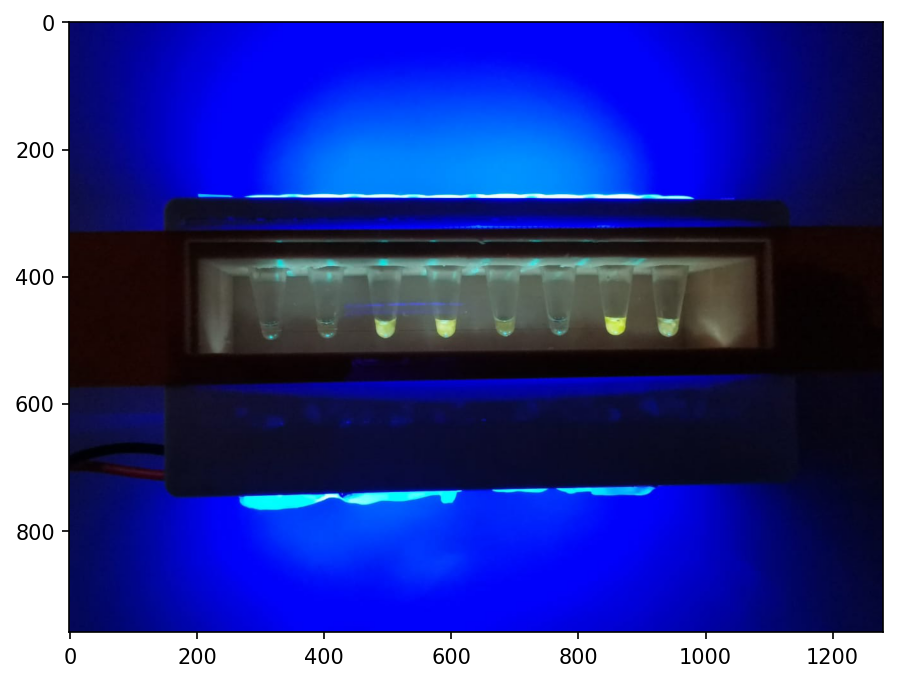

In [8]:
# 1. Cargar la imagen (cambie el nombre de archivo y extension por la suya!)
# Recuerde que para que funcione correctamente este codigo debe girar la imagen en caso de que los tubos
# no se encuentren en posicion horizontal

#imagen = imgbio.cargar_imagen("lamp_andres.jpeg")
#imagen = io.imread("imagen_de_prueba_2.jpeg")
#plt.figure(figsize=(7,7), dpi=150)
#plt.imshow(imagen)

## Obtener una seccion de interés

Debido a que las imagenes generalmente van a ser de dimensiones mayores al area de interés, lo ideal es cortar y seleccionar una sección de dicha imagen. Para esto la funcion ```obtener_seccion(imagen)``` le perimitirá seleccionar una seccion de la imagen para trabajar con esta.

- Esta funcion le indicará los pixeles de su imagen en el eje Y, los pixeles en X y los canales, luego deberá seleccionar un pixel de inicio y pixel final en X, y un pixel de inicio y pixel final en Y.
- En la variable **area_de_interes** quedará guardada la imagen cortada.

In [ ]:
# 2. Obtener area de interes
area_de_interes = imgbio.obtener_seccion(imagen)

Su imagen tiene las siguientes dimensiones:
Pixeles en Y: 960
Pixeles en X: 1280
Canales de color: 3
Ingrese pixel de inicio en X: 250
Ingrese pixel final en X: 1000
Ingrese pixel de inicio en Y: 450
Ingrese pixel final en Y: 550


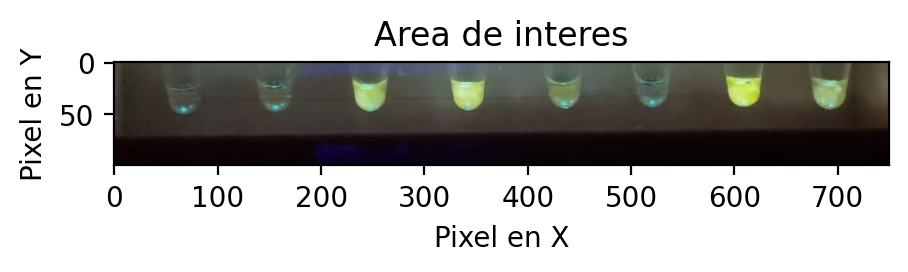

In [ ]:
# Se crea una figura para visualizar la seccion con la cual se trabajará
plt.figure(figsize=(5,5), dpi=200)
plt.title("Area de interes")
plt.xlabel("Pixel en X")
plt.ylabel("Pixel en Y")
plt.imshow(area_de_interes)

## Visualizar los canales de la imagen en distintos espacios de color

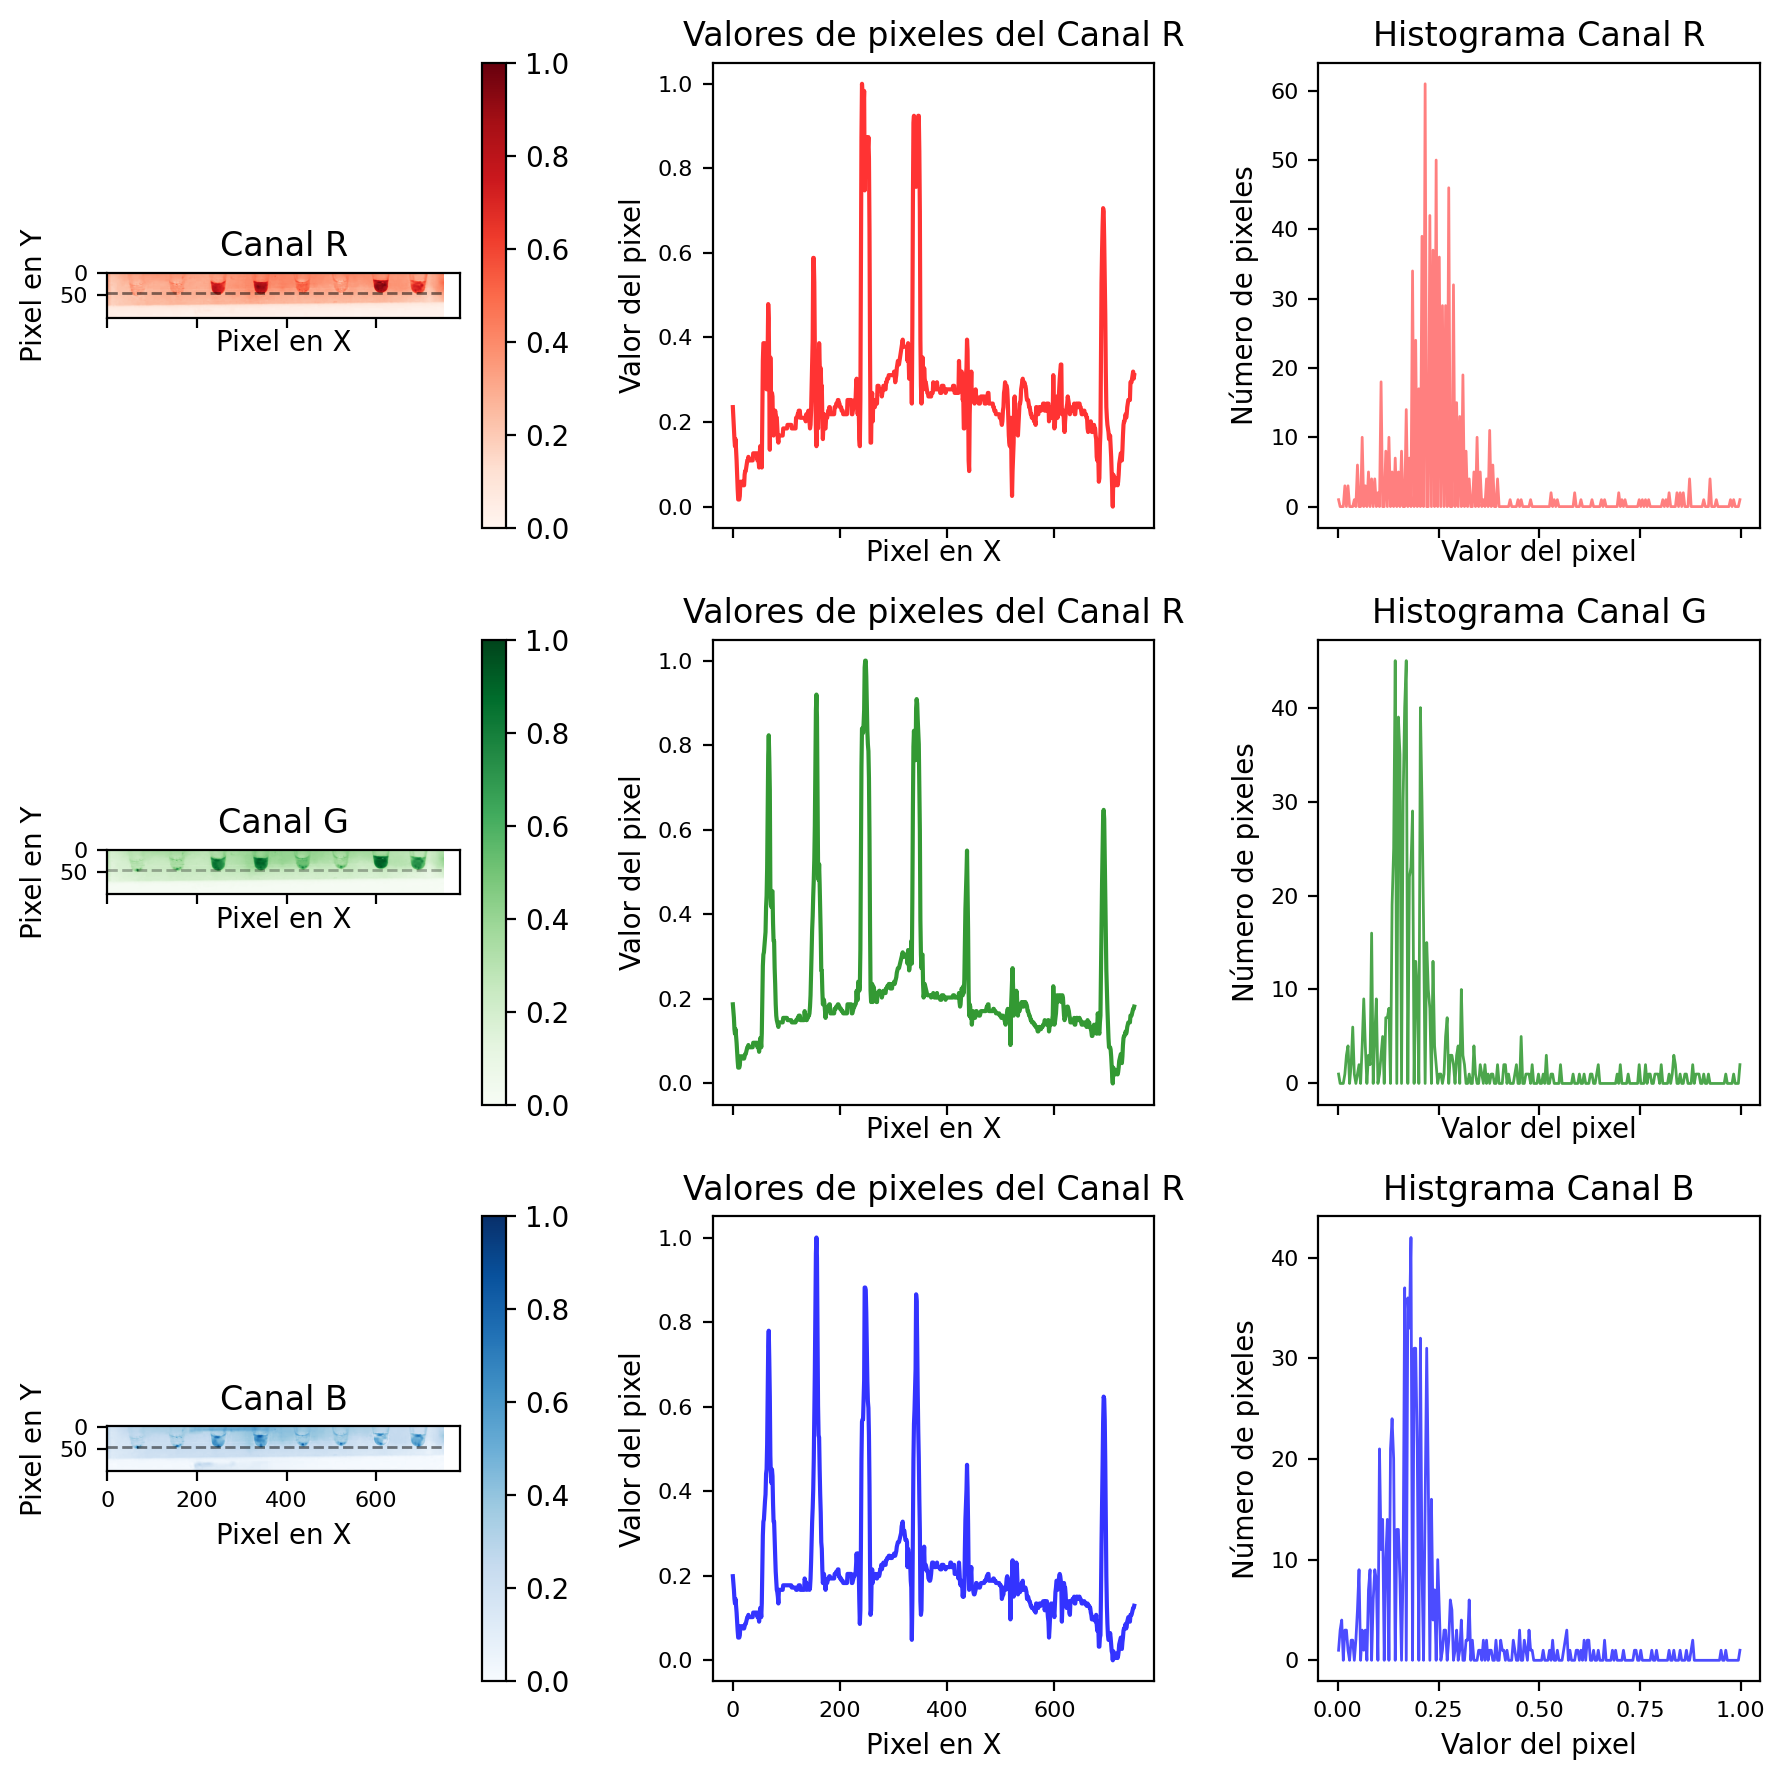

In [ ]:
# 3. Visualizar valores de los pixeles
# Hay 3 funciones que permitiran visualizar distintos espacios de color
# mostrar_canales_RGB -> permite visualizar los valores de los canales R, G y B
# mostrar_canales_HSV -> permite visualizar los valores de los canales H, S y V
# mostrar_canal_greyscale -> permite visualizar los valores de la escala de grises

# Para utilizar estas funciones debe ingresar la imagen a utilizar (se recomienda el area de interes)
# y además ingresar la fila para obtener los valores (ponga atencion al ejemplo)

#imgbio.mostrar_canal_greyscale(area_de_interes, 45)
imgbio.mostrar_canales_RGB(area_de_interes, 45)
#imgbio.mostrar_canales_HSV(area_de_interes, 45)

In [ ]:
# 4. (OPCIONAL) Convertir area de interes a escala de grises o a espacio HSV
# Solamente realice este paso si desea utilizar otro espacio de color para realizar la
# segmentacion de la imagen

area_de_interes_gris = imgbio.convertir_escala_de_grises(area_de_interes)
area_de_interes_hsv = imgbio.convertir_espacio_hsv(area_de_interes)

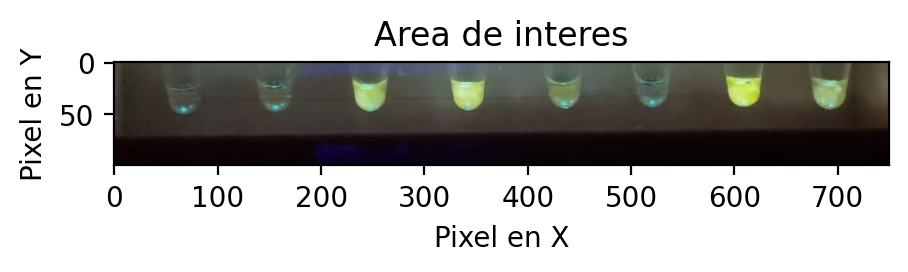

In [ ]:
# Para visualizar la conversión a la escala de grises, HSV o del area de interes
plt.figure(figsize=(5,5), dpi=200)
plt.title("Area de interes")
plt.xlabel("Pixel en X")
plt.ylabel("Pixel en Y")

# Recuerde cambiar acá el nombre de la variable que contiene los datos de la imagen que utilizará
plt.imshow(area_de_interes, cmap="Greys")

In [ ]:
# 5. Segmentar la imagen

# Aca puede utilizar la imagen RGB, HSV o en escala de grises
# También recuerde utilizar el nombre de variable correcto (area_de_interes, area_de_interes_gris, area_de_interes_hsv)
imagen_segmentada = imgbio.segmentar_imagen(area_de_interes)

Por favor ingrese el TIPO de imagen a utilizar
(RGB, GRIS, HSV): rgb
Por favor ingrese el CANAL que utilizará para realizar la segmentación
(ingrese su opcion como numero): 1
Por favor ingrese el UMBRAL que utilizará para segmentar
(entre 0 y 1)0.5
Indique si quiere segmentar aquello MAYOR que el umbral o MENOR que el umbral
(ingrese su opcion como texto): mayor


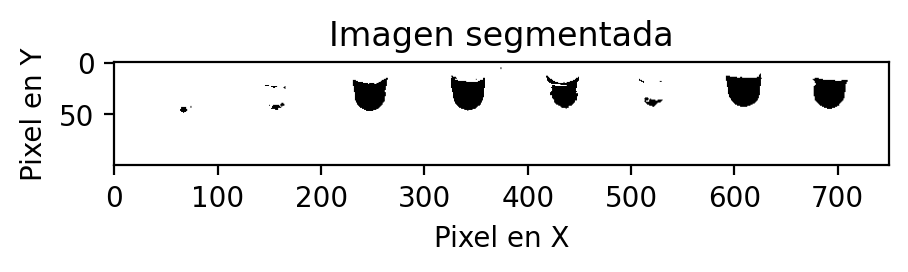

In [ ]:
# Vemos el resultado de la segmentacion
plt.figure(figsize=(5,5), dpi=200)
plt.title("Imagen segmentada")
plt.xlabel("Pixel en X")
plt.ylabel("Pixel en Y")

plt.imshow(imagen_segmentada, cmap="Greys")

In [ ]:
# 6. Limpiar la imagen
# Para esto se utiliza la funcion limpiar_imagen, la cual toma como imput la imagen segmentada
# y además un entero que corresponde al tamaño minimo de los objetos a dejar
# (objetos mas pequeños seran eliminados). 

# Considere que este entero debe ser una aproximación al tamaño (en PIXELES CUADRADOS) de los objetos
# a eliminar

imagen_limpia = imgbio.limpiar_imagen(imagen_segmentada, 250)

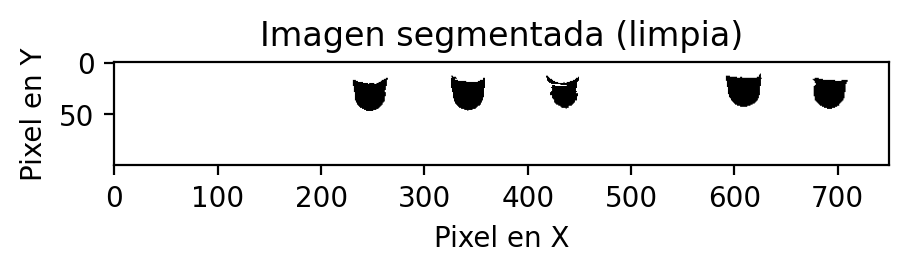

In [ ]:
# Comprobamos la correcta eliminacion de estos objetos
plt.figure(figsize=(5,5), dpi=200)
plt.title("Imagen segmentada (limpia)")
plt.xlabel("Pixel en X")
plt.ylabel("Pixel en Y")


plt.imshow(imagen_limpia, cmap="Greys")

El algoritmo ha detectado 5 tubos postitivos, a continuacion se graficará la imagen


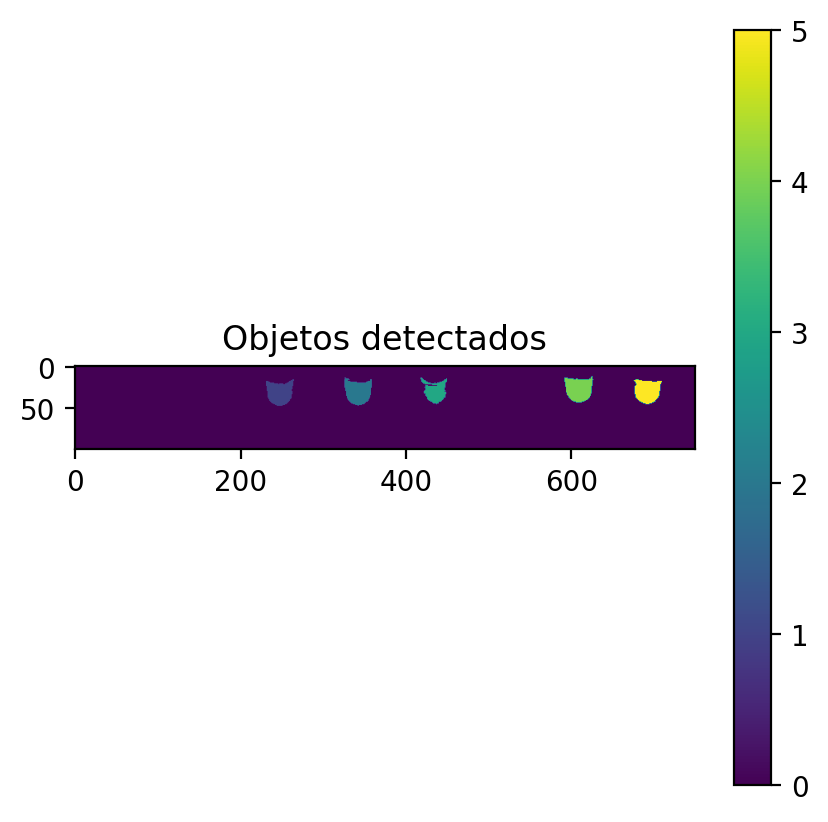

KeyboardInterrupt: ignored

In [ ]:
# 7. Obtener tubos e intensidades de objetos
# Al correr esta celda y finalizar la ejecucion se mostrarán los valores de la intensidad promedio de cada
# tubo "positivo" (positivo entre comillas ya que este codigo esta sujeto a errores de medicion). Tenga
# cuidado al interpretar resultados como positivos ya que puede ser que en su imagen existan artefactos que
# influyan en el procesamiento/analisis.

imgbio.obtener_info_tubos(imagen_limpia, area_de_interes)